# Decision Trees vs Random Forest
Dataset Link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/

Code that I used Link(s):


*   https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
*   https://www.kaggle.com/code/udita3996/eda-logistic-regression-decision-tree




In [1]:
!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [3]:
df = pd.read_csv('/winequality-red.csv')

In [193]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
x = df.drop('quality', axis=1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [6]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2
1491,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4
1502,7.3,0.585,0.18,2.4,0.078,15.0,60.0,0.99638,3.31,0.54,9.8
749,7.3,0.510,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5
1151,6.1,0.580,0.23,2.5,0.044,16.0,70.0,0.99352,3.46,0.65,12.5


In [7]:
pd.DataFrame(y_train).head()

,quality
1589,5
1491,5
1502,5
749,6
1151,6


## Decision Tree

Using sklearn decision tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Basic Decision Tree (criterion='entropy')

In [130]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
tree = DecisionTreeClassifier(criterion='entropy')

In [131]:
start = time.time()
tree.fit(x_train, y_train)
print('training time: ', time.time() - start)

training time:  0.05522632598876953


In [132]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [133]:
print('max depth: ', tree.get_depth())
print('number of leaves: ', tree.get_n_leaves())

max depth:  20
number of leaves:  276


In [134]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [135]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
pred = tree.predict(x_test)

In [136]:
print('Decision Tree Accuracy: ', accuracy_score(y_test, pred))

Decision Tree Accuracy:  0.6125


In [137]:
tree.score(x_test, y_test)

0.6125

In [138]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.06      0.08      0.07        12
           5       0.72      0.70      0.71       208
           6       0.58      0.60      0.59       185
           7       0.52      0.50      0.51        68
           8       0.40      0.29      0.33         7

    accuracy                           0.61       480
   macro avg       0.38      0.36      0.37       480
weighted avg       0.62      0.61      0.62       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest
Using sklearn Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [143]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
from sklearn.ensemble import RandomForestClassifier

In [144]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
rfc = RandomForestClassifier(n_estimators=20, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [145]:
start = time.time()
rfc.fit(x_train, y_train)
print('training time: ', time.time() - start)

training time:  0.10424160957336426


In [146]:
# code adapted from https://www.kaggle.com/code/imprime/decision-tree-and-random-forest
rfc_pred = rfc.predict(x_test)

In [147]:
print('Random Forest Accuracy: ', accuracy_score(y_test, rfc_pred))

Random Forest Accuracy:  0.6625


In [148]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           4       0.33      0.08      0.13        12
           5       0.73      0.76      0.75       208
           6       0.60      0.70      0.64       185
           7       0.67      0.43      0.52        68
           8       0.00      0.00      0.00         7

    accuracy                           0.66       480
   macro avg       0.47      0.39      0.41       480
weighted avg       0.65      0.66      0.65       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Top 10 / Bottom 10 Tree Analysis

In [164]:
def getTopBottom10(random_forest):
  trees = [tree.fit(x_train, y_train) for tree in random_forest.estimators_]
  accuracies = [tree.score(x_test, y_test) for tree in trees]
  sorted_accuracies = sorted(accuracies, reverse=True)
  accuracies_table = pd.DataFrame(data = {'Top 10 Trees Accuracies': sorted_accuracies[0:10], 'Bottom 10 Trees Accuracies': sorted_accuracies[len(trees)-10:]})
  return accuracies_table

In [165]:
accuracies_table = getTopBottom10(rfc)

In [167]:
accuracies_table

,Top 10 Trees Accuracies,Bottom 10 Trees Accuracies
0,0.635417,0.604167
1,0.633333,0.604167
2,0.627083,0.604167
3,0.622917,0.600000
4,0.620833,0.597917
5,0.620833,0.597917
6,0.620833,0.595833
7,0.618750,0.593750
8,0.616667,0.593750
9,0.616667,0.589583


## Random Forest Experiment (changing number of trees)

In [185]:
num_trees = [i for i in range(30, 110, 10)]
rfcs = []
rfc_accuracies = []
rfc_training_times = []

for t in num_trees:
  rfc = RandomForestClassifier(n_estimators=t, criterion='entropy')

  # training time experiment
  start = time.time()
  rfc.fit(x_train, y_train)
  rfc_training_times.append(time.time() - start)

  # accuracy experiment
  rfc_accuracies.append(rfc.score(x_test, y_test))

  rfcs.append(rfc)

Text(0.5, 1.0, 'Accuracy of Random Forest vs Number of Trees')

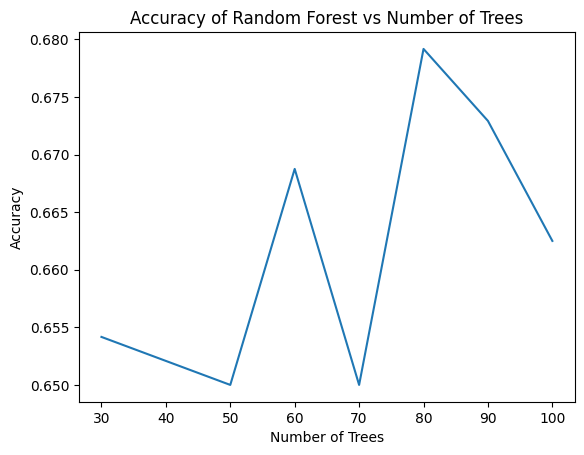

In [186]:
plt.plot(num_trees, rfc_accuracies)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest vs Number of Trees')

Text(0.5, 1.0, 'Training Time of Random Forest vs Number of Trees')

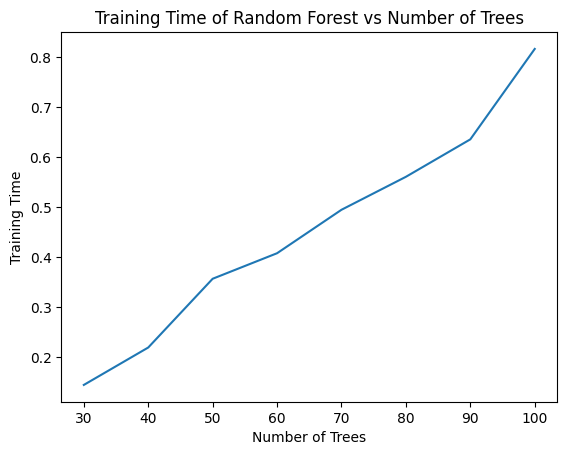

In [187]:
plt.plot(num_trees, rfc_training_times)
plt.xlabel('Number of Trees')
plt.ylabel('Training Time')
plt.title('Training Time of Random Forest vs Number of Trees')

In [191]:
print(max(rfc_accuracies))
print(rfcs[np.argmax(rfc_accuracies)])

0.6791666666666667
RandomForestClassifier(criterion='entropy', n_estimators=80)


In [192]:
getTopBottom10(rfcs[np.argmax(rfc_accuracies)])

,Top 10 Trees Accuracies,Bottom 10 Trees Accuracies
0,0.641667,0.583333
1,0.635417,0.581250
2,0.631250,0.581250
3,0.629167,0.570833
4,0.629167,0.570833
5,0.629167,0.570833
6,0.627083,0.568750
7,0.627083,0.564583
8,0.622917,0.560417
9,0.622917,0.554167
